# Worksheet 07

Name: **Bowen Li**  
UID: **U79057147** 

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

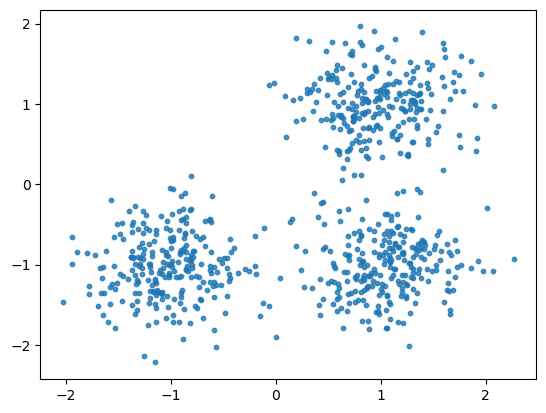

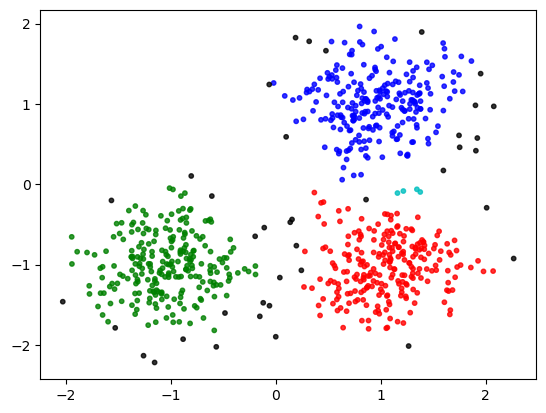

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

        self.assignments = assignments = [-1 for _ in range(len(dataset))]

    def is_unassigned(self, i):
        return self.assignments[i] == -1

    def distance(self, i, j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])

    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if i != j and self.distance(i, j) <= self.epsilon:
                neighborhood.append(j)
        return neighborhood

    def get_unassigned_neighborhood(self, i):
        neighborhood = self.get_neighborhood(i)
        return [point for point in neighborhood if self.is_unassigned(point)]
    
    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts

    def make_cluster(self, i, cluster_num):
        self.assignments[i] = cluster_num
        neighborhood_queue = self.get_unassigned_neighborhood(i)

        while neighborhood_queue:
            next_pt = neighborhood_queue.pop()
            if not self.is_unassigned(next_pt):
                continue
            self.assignments[next_pt] = cluster_num # NOTE: border points will be assigned in a FCFS way
            
            if self.is_core(next_pt):
                neighborhood_queue += self.get_unassigned_neighborhood(next_pt)
        
        return

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        
        cluster_num = 0
        for i in range(len(self.dataset)):
            if self.assignments[i] != -1:
                continue

            if self.is_core(i):
                # start building a new cluster
                self.make_cluster(i, cluster_num)
                cluster_num += 1
        
        return self.assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 100)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()

## Challenge Problem

Using the code above and the template provided below, create the animation below of the DBScan algorithm.

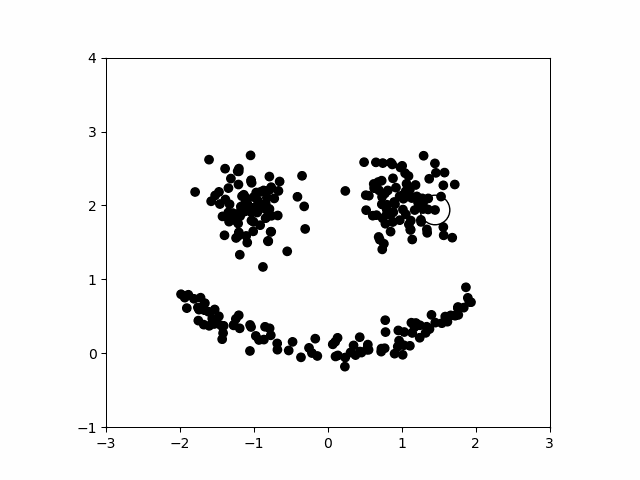

In [32]:
from IPython.display import Image
Image(filename="dbscan.gif", width=500, height=500)

Hints:

- First animate the dbscan algorithm for the dataset used in class (before trying to create the above dataset)
- Take a snapshot of the assignments when the point gets assigned to a cluster
- Confirm that the snapshot works by saving it to a file
- Don't forget to close the matplotlib plot after saving the figure
- Gather the snapshots in a list of images that you can then save as a gif using the code below
- Use `ax.set_aspect('equal')` so that the circles don't appear to be oval shaped
- To create the above dataset you need two blobs for the eyes. For the mouth you can use the following process to generate (x, y) pairs:
  - Pick an x at random in an interval that makes sense given where the eyes are positioned
  - For that x generate y that is 0.2 * x^2 plus a small amount of randomness
  - `zip` the x's and y's together and append them to the dataset containing the blobs

In [31]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = 'temp.png'

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts 
        self.epsilon = epsilon
        self.snaps = []
        
        self.assignments = np.full(len(self.dataset), -1)


    def snapshot(self, point):
        fig, ax = plt.subplots()

        _, color_indices = np.unique(self.assignments, return_inverse=True)
        colors = np.array(list('krgbcmy'))[color_indices]

        ax.scatter(self.dataset[: , 0], self.dataset[:, 1], c=colors)
        cir = plt.Circle(self.dataset[point], radius=.2, fill=False, ec='k') # create circle around the point assigned
        ax.add_patch(cir)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-1, 4)
        ax.set_aspect('equal') # necessary or else the circles appear to be oval shaped

        fig.savefig(TEMPFILE)
        plt.close()

        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

        return


    def is_assigned(self, i):
        return self.assignments[i] != -1

    def distance(self, i, j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])

    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if i != j and self.distance(i, j) <= self.epsilon:
                neighborhood.append(j)
        return neighborhood

    def get_unassigned_neighborhood(self, i):
        neighborhood = self.get_neighborhood(i)
        return [point for point in neighborhood if not self.is_assigned(point)]

    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts

    def make_cluster(self, i, cluster_num):
        self.snapshot(i)
        self.assignments[i] = cluster_num
        neighborhood_queue = self.get_unassigned_neighborhood(i)

        while neighborhood_queue:
            next_pt = neighborhood_queue.pop()
            if self.is_assigned(next_pt):
                continue

            self.snapshot(next_pt)
            self.assignments[next_pt] = cluster_num # NOTE: border points will be assigned in a FCFS way
            
            if self.is_core(next_pt):
                neighborhood_queue += self.get_unassigned_neighborhood(next_pt)
        
        return
    
    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        
        cluster_num = 0
        for i in range(len(self.dataset)):
            if self.is_assigned(i):
                continue

            if self.is_core(i):
                # start building a new cluster
                self.make_cluster(i, cluster_num)
                cluster_num += 1
        
        return self.assignments


centers = [[1,2],[-1,2]]
eyes, _ = datasets.make_blobs(n_samples=175, centers=centers, cluster_std=0.3, 
                              random_state=0)

n_mouth_samples = 100

mouth_x = 4 * np.random.random(n_mouth_samples) - 2
mouth_y = 0.2 * np.power(mouth_x, 2) + .1 * np.random.randn(n_mouth_samples)

face = np.append(eyes, np.c_[mouth_x, mouth_y], axis=0)

dbc = DBC(face, 3, .3)
clustering = dbc.dbscan()

dbc.snaps[0].save(
    'dbscan.gif',
    optimize=False,
    save_all=True,
    append_images=dbc.snaps[1:],
    loop=0,
    duration=25
)